# Copolymerization Fit

This is a preliminary demonstration of the copolymerization fitting capabilities being developed. For the time being, we are restricting ourselves to fitting $F(f)$ data. Methods for composition drift data will be introduced soon.

In [1]:
# %pip install polykin

In [2]:
from polykin.copolymerization.fitting import fit_reactivity_ratios
import numpy as np

## Mayo-Lewis Data

### Benchmark: van Herk & Dröge (1997)

[van Herk & Dröge (1997)](https://research.tue.nl/files/1500487/617672.pdf) discuss various approaches to estimating the reactivity ratios and their respective statistical uncertainties. Let's replicate certain elements of their study using the $F(f)$ data for MMA(1)-DMA(2) as reported in Table 1.

In [3]:
f1 = [0.100, 0.300, 0.400, 0.500, 0.600, 0.700, 0.800]
F1 = [0.059, 0.243, 0.364, 0.486, 0.583, 0.721, 0.824]

Let's begin by fitting the data using the nonlinear least squares (NLLS) method, assuming that all $F$ data points have the same _absolute_ error. In this scenario, there is no need to specify the scaling for $F$.

method:     NLLS
M1:         M1
M2:         M2
r1:         1.43E+00
r2:         1.67E+00
alpha:   0.05
se_r1:   9.11E-02
se_r2:   1.09E-01
ci_r1:   2.34E-01
ci_r2:   2.79E-01
cov:     [[0.00829822 0.00873752]
 [0.00873752 0.01179585]]

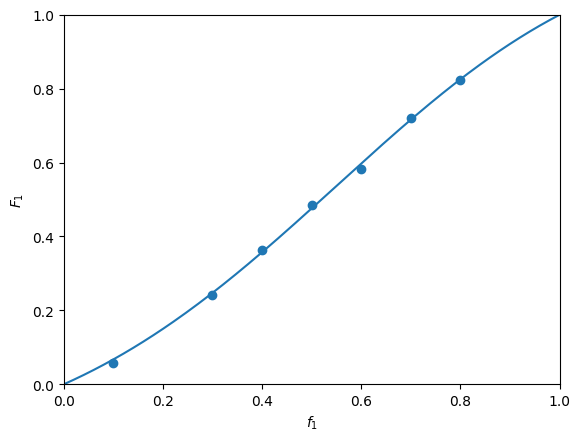

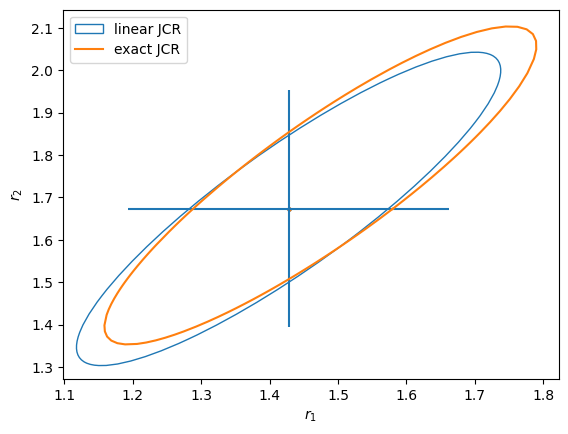

In [4]:
fit_reactivity_ratios(f1, F1,
                      method = 'NLLS',
                      alpha=0.05,
                      JCR_method=['linear', 'exact'])

The point estimates match those reported in Table 3 of the aforementioned reference. The blue horizontal and vertical lines represent the individual confidence intervals of $r_1$ and $r_2$. A difference between the linear (approximate) and exact JCR is visible, but fairly small.

Now, let's try the orthogonal distance regression (ODR) method, also known as errors-in-variables, assuming absolute standard deviations of 5% for $F$ and 1% for $f$. In this case, the scale factors to matter, because they influence how the fit error is distributed between $f$ and $F$.

method:     ODR
M1:         M1
M2:         M2
r1:         1.43E+00
r2:         1.67E+00
alpha:   0.05
se_r1:   9.10E-02
se_r2:   1.08E-01
ci_r1:   2.34E-01
ci_r2:   2.79E-01
cov:     [[0.00828524 0.00871394]
 [0.00871394 0.01176537]]

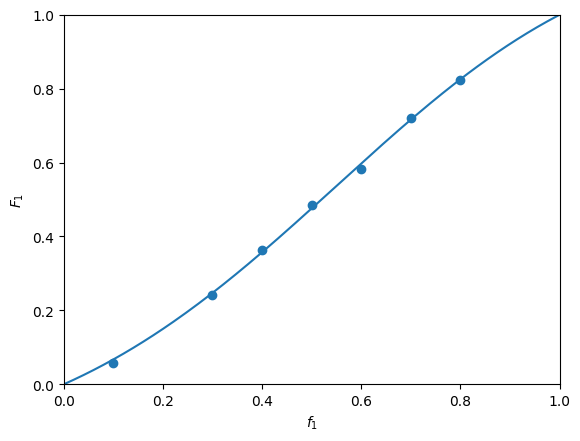

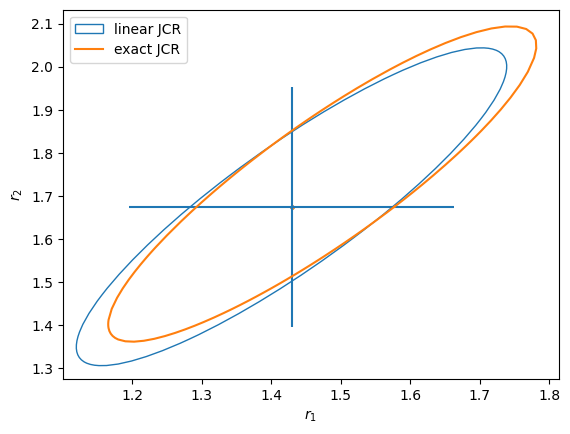

In [5]:
fit_reactivity_ratios(f1, F1,
                      scale_f=0.01,
                      scale_F=0.05,
                      method = 'ODR',
                      alpha=0.05,
                      JCR_method=['linear', 'exact'])

As expected, we get almost the same parameter estimates, because the data is smooth and $\sigma_f$ is low. Finally, for comparison, we also try fitting the data set with _relative_ standard deviations. 

method:     ODR
M1:         M1
M2:         M2
r1:         1.71E+00
r2:         1.95E+00
alpha:   0.05
se_r1:   1.18E-01
se_r2:   7.46E-02
ci_r1:   3.03E-01
ci_r2:   1.92E-01
cov:     [[0.01388988 0.0069102 ]
 [0.0069102  0.00555906]]

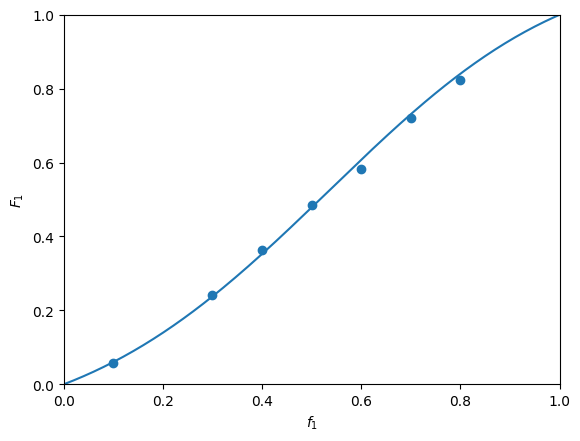

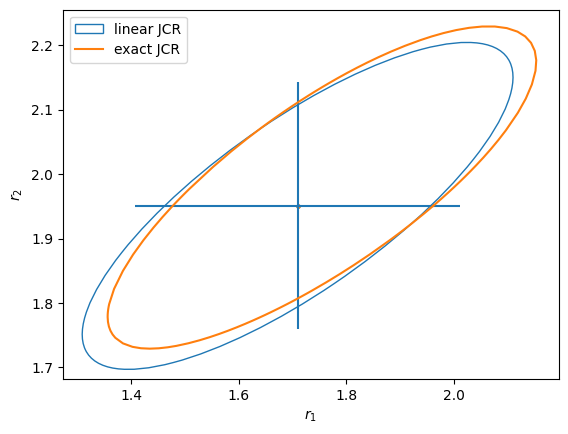

In [6]:
fit_reactivity_ratios(f1, F1,
                      scale_f=0.01*np.array(f1),
                      scale_F=0.05*np.array(F1),
                      method = 'ODR',
                      alpha=0.05,
                      JCR_method=['linear', 'exact'])

In this case, the point estimates of the reactivity ratio estimates are a bit higher. As before, the values are in perfect agreement with those reported in Table 3 of van Herk & Dröge (1997).

### Benchmark: Harrison's example (2024)

This example poses a greater numerical challenge compared to the previous one due to the significant difference in reactivity between the two monomers.

In [7]:
f1 = [0.100, 0.200, 0.300, 0.400, 0.500, 0.600, 0.700, 0.800, 0.900, 0.100, 0.200, 0.300, 0.400, 0.500, 0.600, 0.700, 0.800, 0.900]
F1 = [0.010, 0.008, 0.035, 0.036, 0.035, 0.059, 0.088, 0.153, 0.257, 0.000, 0.012, 0.038, 0.042, 0.049, 0.079, 0.106, 0.149, 0.258]

method:     NLLS
M1:         M1
M2:         M2
r1:         9.01E-03
r2:         1.91E+01
alpha:   0.05
se_r1:   6.46E-03
se_r2:   1.02E+00
ci_r1:   1.37E-02
ci_r2:   2.16E+00
cov:     [[4.16685640e-05 5.45678436e-03]
 [5.45678436e-03 1.03900732e+00]]

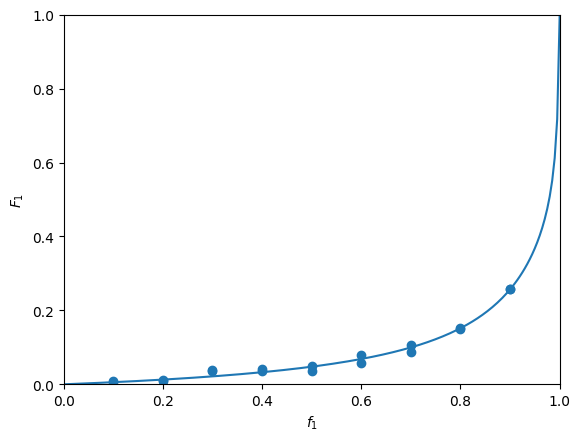

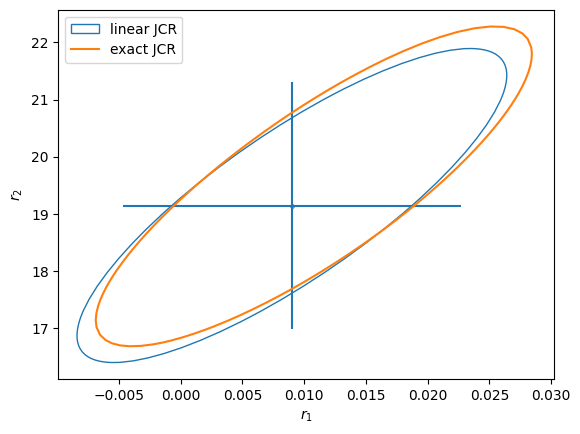

In [8]:
fit_reactivity_ratios(f1, F1,
                      method = 'NLLS',
                      alpha=0.05,
                      JCR_method=['linear', 'exact'])

Once more, the mathematical accuracy regarding point estimates and JCRs remains intact. It's worth noting that, unlike Harrison, we refrain from applying a logarithmic transformation to the parameters.

## Summary

* Efficient and validated NLLS and ODR (error-in-variables) methods.
* Linear and exact JCRs. IMO, the linear approximation seems to be good enough (but the only way to know it, was to compute the exact JCR ;)). 